In [1]:
#Import libraries
import math
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
%matplotlib inline 

In [2]:
#Reading files to load into data frame and display the same (df.head gives first five records of data frame)
data_frame= pd.read_csv('insurance.csv')
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Shape of data frame
data_frame.shape

(1338, 7)

In [4]:
# data type of data frame
type(data_frame)

pandas.core.frame.DataFrame

In [5]:
# data type of column in data frame(mainly index)
type(data_frame.columns)

pandas.core.indexes.base.Index

In [6]:
#data type of each attribtue in data frame
data_frame.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#summary of data frame
data_frame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [9]:
data_frame.notnull(),data_frame.notnull().sum()

(       age   sex   bmi  children  smoker  region  charges
 0     True  True  True      True    True    True     True
 1     True  True  True      True    True    True     True
 2     True  True  True      True    True    True     True
 3     True  True  True      True    True    True     True
 4     True  True  True      True    True    True     True
 ...    ...   ...   ...       ...     ...     ...      ...
 1333  True  True  True      True    True    True     True
 1334  True  True  True      True    True    True     True
 1335  True  True  True      True    True    True     True
 1336  True  True  True      True    True    True     True
 1337  True  True  True      True    True    True     True
 
 [1338 rows x 7 columns],
 age         1338
 sex         1338
 bmi         1338
 children    1338
 smoker      1338
 region      1338
 charges     1338
 dtype: int64)

In [10]:
data_frame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#To determine Max and Min as part of 5 point summary
df_min, df_max = data_frame.min(), data_frame.max()
print(df_min)

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object


In [12]:
print(df_max)

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object


In [13]:
#display 1st quantile
print(data_frame.quantile(0.25))

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64


In [14]:
#display 2nd qunatile
print(data_frame.quantile(0.5))

age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64


In [15]:
#display 3rd qunatile
print(data_frame.quantile(0.75))

age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


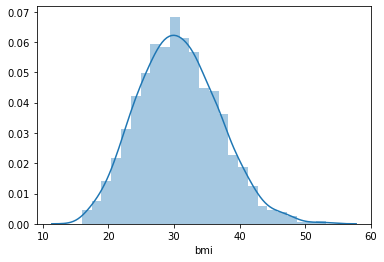

In [16]:
#Univariate distribution plot
sns.distplot(data_frame['bmi'])
plt.show()

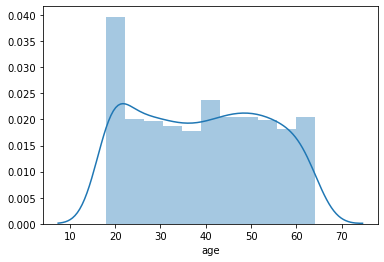

In [17]:
#distribution plot of Age
sns.distplot(data_frame['age'])
plt.show()

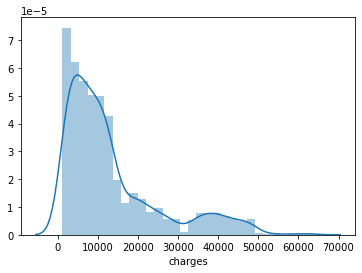

In [18]:
#distribution of charges
sns.distplot(data_frame['charges'])
plt.show()

In [19]:
#check the skewness of data frame
data_frame.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

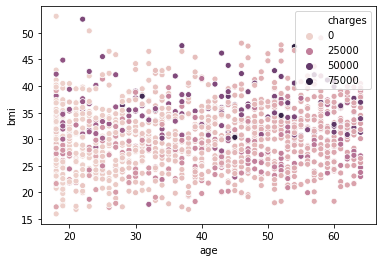

In [20]:
sns.scatterplot(data_frame['age'],data_frame['bmi'],hue=data_frame['charges'])
plt.show()

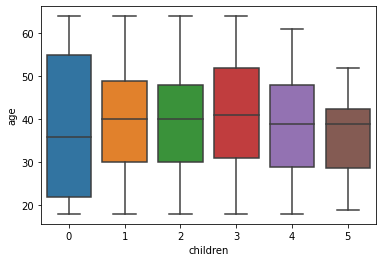

In [21]:
#check the presence of outliers
sns.boxplot(x='children', y='age',data=data_frame)
plt.show()

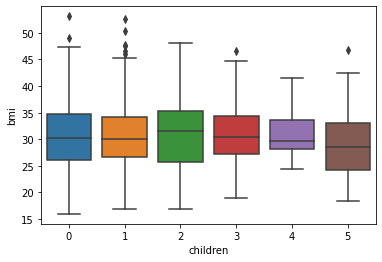

In [31]:
#check the presence of outliers
sns.boxplot(x='children', y='bmi',data=data_frame)
plt.show()

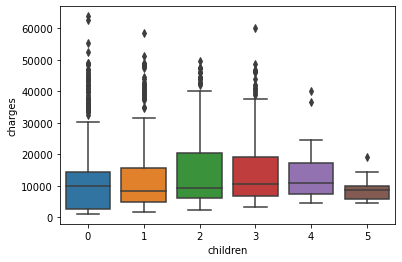

In [22]:
#check the presence of outliers
sns.boxplot(x='children', y='charges',data=data_frame)
plt.show()

In [23]:
#categorical data
data_cat=data_frame[['sex','children','region','smoker']]
data_cat.head(10)

,sex,children,region,smoker
0,female,0,southwest,yes
1,male,1,southeast,no
2,male,3,southeast,no
3,male,0,northwest,no
4,male,0,northwest,no
5,female,0,southeast,no
6,female,1,southeast,no
7,female,3,northwest,no
8,male,2,northeast,no
9,female,0,northwest,no


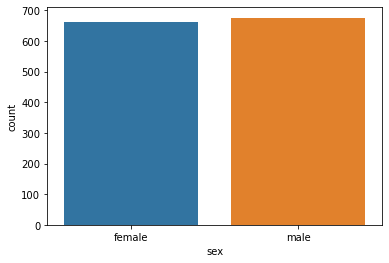

In [24]:
#categorical plot
sns.countplot(data_cat['sex'])
plt.show()

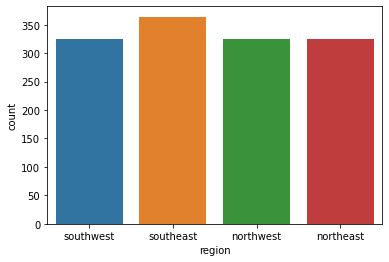

In [25]:
#categorical plot
sns.countplot(data_cat['region'])
plt.show()

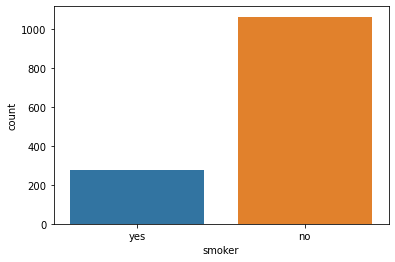

In [26]:
#categorical plot
sns.countplot(data_cat['smoker'])
plt.show()

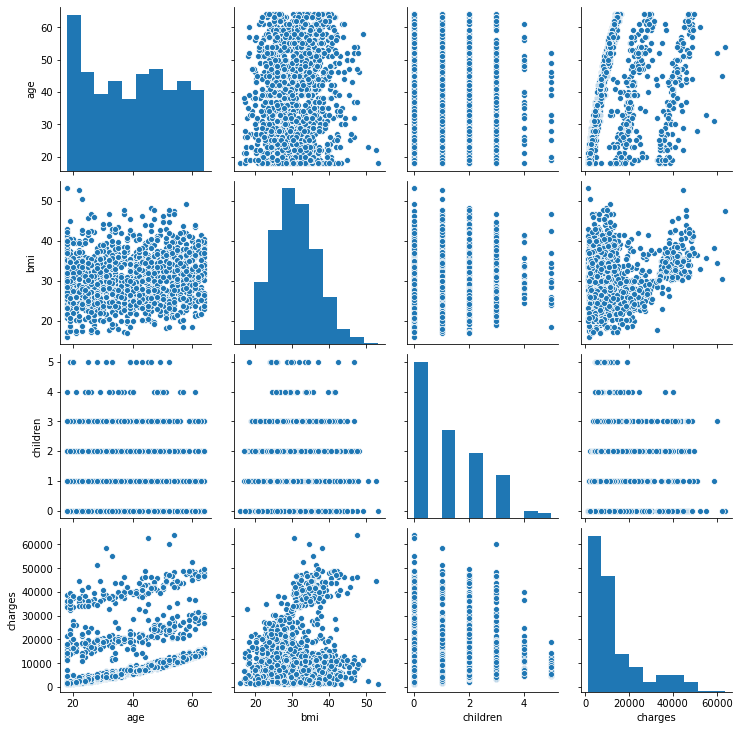

In [27]:
#pair plot for age,bmi,children and   charges
sns.pairplot(data_frame)
plt.show()

In [28]:
#check the mean and median 
data_frame[data_frame.smoker == 'yes'][['charges']].mean(), data_frame[data_frame.smoker == 'no'][['charges']].mean()

(charges    32050.231832
 dtype: float64,
 charges    8434.268298
 dtype: float64)

In [29]:
data_frame[data_frame.smoker == 'yes'][['charges']].median(), data_frame[data_frame.smoker == 'no'][['charges']].median()

(charges    34456.34845
 dtype: float64,
 charges    7345.4053
 dtype: float64)

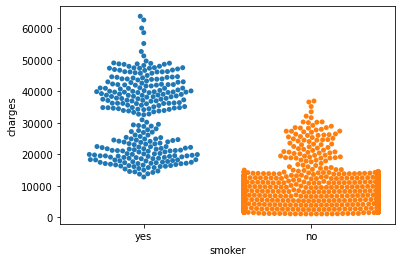

In [30]:
sns.swarmplot(x='smoker',y='charges',data=data_frame[['smoker','charges']])
plt.show()

Yes, charges of people who smoke differ significantly from the people who don't.

In [31]:
data_frame[data_frame.sex == 'male'][['bmi']].mean(), data_frame[data_frame.sex == 'female'][['bmi']].mean()

(bmi    30.943129
 dtype: float64,
 bmi    30.377749
 dtype: float64)

In [32]:
data_frame[data_frame.sex == 'male'][['bmi']].median(), data_frame[data_frame.sex == 'female'][['bmi']].median()

(bmi    30.6875
 dtype: float64,
 bmi    30.1075
 dtype: float64)

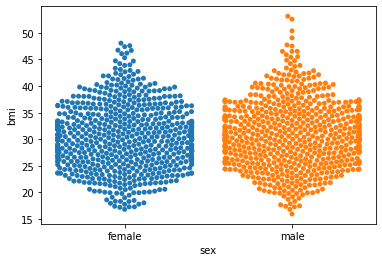

In [33]:
sns.swarmplot(x='sex',y='bmi',data=data_frame[['sex','bmi']])
plt.show()

No, bmi of males doesnt differ significantly from females.

In [34]:
#proportions
data_prop=data_frame[data_frame.smoker=='yes']
data_prop

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [35]:
data_prop_ss=data_prop[['smoker','sex']]
data_prop_ss

,smoker,sex
0,yes,female
11,yes,female
14,yes,male
19,yes,male
23,yes,female
...,...,...
1313,yes,female
1314,yes,female
1321,yes,male
1323,yes,female


In [36]:
data_prop_ss_f,data_prop_ss_m=data_prop_ss[data_prop_ss.sex=='female'],data_prop_ss[data_prop_ss.sex=='male']
data_prop_ss_f,data_prop_ss_m

(     smoker     sex
 0       yes  female
 11      yes  female
 23      yes  female
 58      yes  female
 64      yes  female
 ...     ...     ...
 1308    yes  female
 1313    yes  female
 1314    yes  female
 1323    yes  female
 1337    yes  female
 
 [115 rows x 2 columns],
      smoker   sex
 14      yes  male
 19      yes  male
 29      yes  male
 30      yes  male
 34      yes  male
 ...     ...   ...
 1301    yes  male
 1303    yes  male
 1304    yes  male
 1307    yes  male
 1321    yes  male
 
 [159 rows x 2 columns])

In [37]:
prop_male=data_prop_ss_m.count()/data_frame[data_frame.smoker=='yes']['smoker'].count()
prop_male

smoker    0.580292
sex       0.580292
dtype: float64

In [38]:
prop_female=data_prop_ss_f.count()/data_frame[data_frame.smoker=='yes']['smoker'].count()
prop_female,prop_male

(smoker    0.419708
 sex       0.419708
 dtype: float64,
 smoker    0.580292
 sex       0.580292
 dtype: float64)

No, the proportion of smokers is not significantly different in different genders

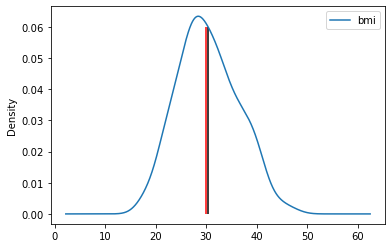

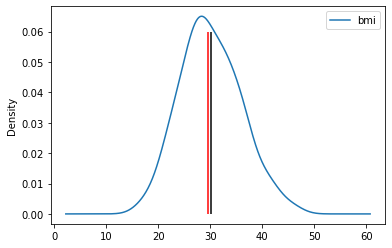

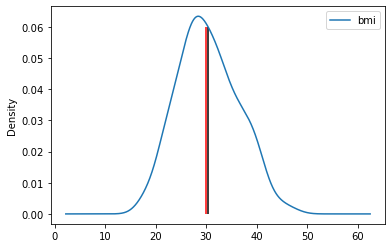

In [54]:
#distribution accross women with no children
data_female=data_frame[data_frame.sex=='female']
data_female_h0=data_female[data_female.children==0]
data_female_h0[['bmi']].plot(kind='density')
plt.vlines(data_female_h0[['bmi']].mean(),ymin=0, ymax=0.06)
plt.vlines(data_female_h0[['bmi']].median(),ymin=0, ymax=0.06,color='red')
#distribution accross women with 1 children
data_female_h1=data_female[data_female.children==1]
data_female_h1[['bmi']].plot(kind='density')
plt.vlines(data_female_h1[['bmi']].mean(),ymin=0, ymax=0.06)
plt.vlines(data_female_h1[['bmi']].median(),ymin=0, ymax=0.06,color='red')
#distribution accross women with 2 children
data_female_h2=data_female[data_female.children==0]
data_female_h2[['bmi']].plot(kind='density')
plt.vlines(data_female_h2[['bmi']].mean(),ymin=0, ymax=0.06)
plt.vlines(data_female_h2[['bmi']].median(),ymin=0, ymax=0.06,color='red')
plt.show()
plt.show()


The distribution of bmi is almost similar for woman having no, one and two children.